In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder, LabelEncoder

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [37]:
df = pd.read_csv('online_shop.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Define Problems & Goals

### Problems 
- Menemukan Perilaku Customer saat Menggunakan Online Shop
### Goals
- Mencari Apa yang mempengaruhi Daya Beli Customer
- Apa yang menjadi Faktor Supaya Customer Ingin Membeli
- Membikin Model Machine Learning untuk Menentukan Precision

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [146]:
df.shape

(12330, 18)

In [41]:
Desc = []

for i in df.columns:
    Desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])
    cek=pd.DataFrame(data = Desc,
            columns = [
                'Column',
                'DataType',
                'Null',
                'Null (%)',
                'nUnique',
                'Unique Samples'
            ])
print('Pengecekan Nama Column, Tipe Data, Missing Value dan Unique')
print('_'*60)
cek

Pengecekan Nama Column, Tipe Data, Missing Value dan Unique
____________________________________________________________


,Column,DataType,Null,Null (%),nUnique,Unique Samples
0,Administrative,int64,0,0.0,27,[15]
1,Administrative_Duration,float64,0,0.0,3335,[65.83333333]
2,Informational,int64,0,0.0,17,[13]
3,Informational_Duration,float64,0,0.0,1258,[164.0]
4,ProductRelated,int64,0,0.0,311,[220]
5,ProductRelated_Duration,float64,0,0.0,9551,[72.25]
6,BounceRates,float64,0,0.0,1872,[0.007246377]
7,ExitRates,float64,0,0.0,4777,[0.006593407]
8,PageValues,float64,0,0.0,2704,[5.638103093]
9,SpecialDay,float64,0,0.0,6,[0.0]


# Column Description

- Administrative : Administrative Value
- Administrative_Duration : Duration in Administrative Page
- Informational : Informational Value
- Informational_Duration : Duration in Informational Page
- ProductRelated : Product Related Value
- ProductRelated_Duration : Duration in Product Related Page
- BounceRates : Bounce Rates of a web page
- ExitRates : Exit rate of a web page
- PageValues : Page values of each web page
- SpecialDay : Special days like valentine etc
- Month : Month of the year
- OperatingSystems : Operating system used
- Browser : Browser used
- Region : Region of the user
- TrafficType : Traffic Type
- VisitorType : Types of Visitor
- Weekend : Weekend or not
- Revenue : Revenue will be generated or not

## Pengecheckan Data (Missing Value, Data Balance, Outliers)

In [42]:
df['Revenue'].value_counts()/len(df['Revenue'])
# Data Imbalance

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [43]:
df.isna().sum()
# Tidak ada missing Value

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
#### Categorical Features

df['SpecialDay'] = df['SpecialDay'].astype('object')
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [ ]:
df['Administrative']=df['Administrative'].astype(object)
df['Informational']=df['Informational'].astype(object)
df['ProductRelated']=df['ProductRelated'].astype(object)
df['OperatingSystems']=df['OperatingSystems'].astype(object)
df['Browser']=df['Browser'].astype(object)
df['Region']=df['Region'].astype(object)
df['TrafficType']=df['TrafficType'].astype(object)
df['SpecialDay']=df['SpecialDay'].astype(object)
df.info()

In [150]:
### Numerical Features
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

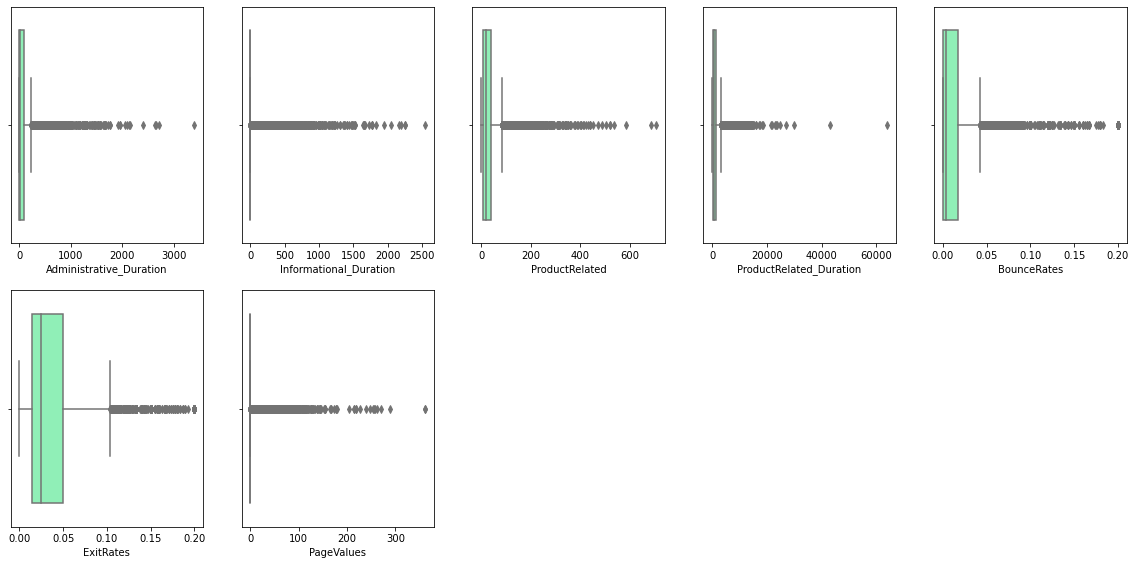

In [153]:
# Mencari Outliers by Boxplot
df_describe = df.drop(columns = ['Revenue','Administrative', 'Informational', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(x=df_describe[column], palette='rainbow')
    x+=1
plt.tight_layout
plt.show()

## Descriptive Statistic

In [55]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [56]:
df.describe(include = 'O')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


## Pengecheckan Correlation menggunakan Crammers'V & Correlation Ratio

In [63]:
import math
import scipy.stats as ss
from collections import Counter

### Crammers V

In [83]:
def cramers(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1))/ (n-1))
    rcorr = r - ((r-1) ** 2) / (n-1)
    kcorr = k - ((k-1) ** 2) / (n-1)
    return np.sqrt(phi2corr/ min((kcorr - 1), (rcorr-1)))

In [84]:
cramers(df['Revenue'], df['Administrative'])

0.17762198739670398

In [85]:
cramers(df['Revenue'], df['Informational'])

0.11423252932835996

In [86]:
cramers(df['Revenue'], df['SpecialDay'])

0.0859486863339118

In [87]:
cramers(df['Revenue'], df['Month'])

0.1746191605949778

In [88]:
cramers(df['Revenue'], df['OperatingSystems'])

0.07428054844300898

In [89]:
cramers(df['Revenue'], df['Browser'])

0.035701293844526735

In [90]:
cramers(df['Revenue'], df['Region'])

0.010077574695100167

In [91]:
cramers(df['Revenue'], df['TrafficType'])

0.16948295744308015

In [92]:
cramers(df['Revenue'], df['VisitorType'])

0.10396150383619449

In [93]:
cramers(df['Revenue'], df['Weekend'])

0.02759876309783614

In [99]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [95]:
assoc_cramers = []
for i in df.columns:
    assoc = round(cramers(df['Revenue'], df[i]), 2)
    assoc_cramers.append(assoc)

In [129]:
data_cramers = pd.DataFrame(data = [assoc_cramers], columns = df.columns, index = ['Revenue'])

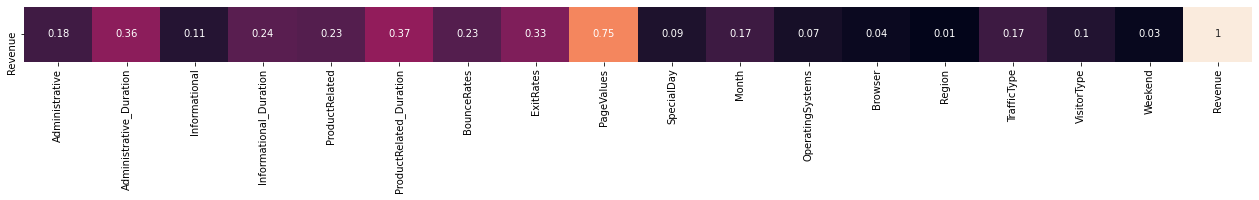

In [97]:
plt.figure(figsize=(22, 1))
sns.heatmap(data_cramers, annot=True, cbar=False)
plt.show()

### Correlation Ratio

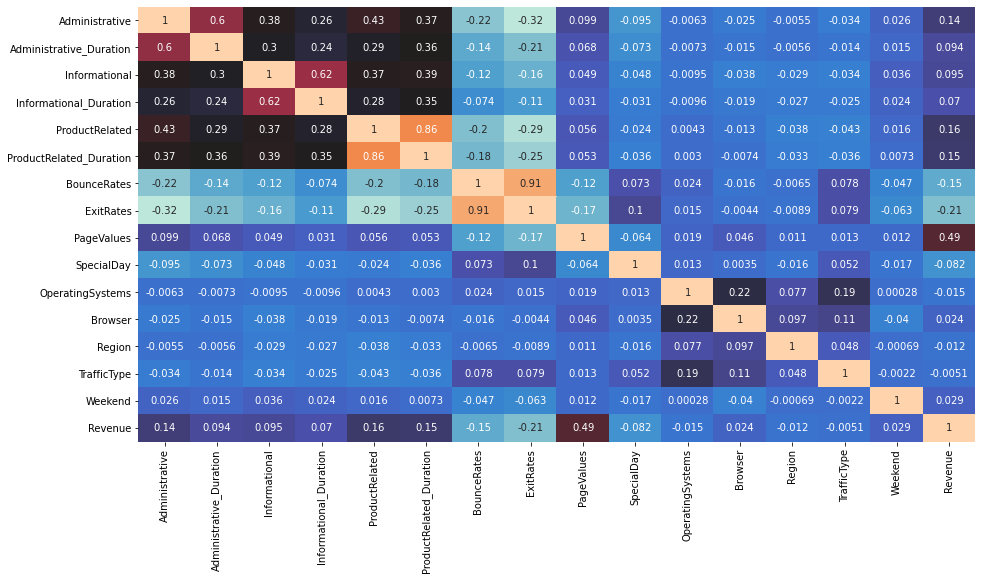

In [111]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap = 'icefire')
plt.show()
# Terdapat Korelasi Terbesar di Page Values
# Bounce Rate Dan Exit Rates sangat berhubungan, Jika mempunyai Bounce Rate yang Tinggi, juga mempunyai Exit Rate yg tinggi
# Product Mendapatkan Revenue Terbanyak Dari Product Related

In [132]:
df_corr = df

In [114]:
def corr_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range (0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta
        

In [133]:
df_corr.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [117]:
corr_ratio(df_corr['Administrative_Duration'], df_corr['Revenue'])

0.6345279131949703

In [118]:
corr_ratio(df_corr['Informational_Duration'], df_corr['Revenue'])

0.39909312710545636

In [119]:
corr_ratio(df_corr['ProductRelated_Duration'], df_corr['Revenue'])

0.9556929846061251

In [120]:
corr_ratio(df_corr['BounceRates'], df_corr['Revenue'])

0.4507615155841089

In [121]:
corr_ratio(df_corr['ExitRates'], df_corr['Revenue'])

0.7060284465792421

In [122]:
corr_ratio(df_corr['PageValues'], df_corr['Revenue'])

0.8817936120197688

In [139]:
df_corr.drop(columns = ['Month', 'VisitorType'], axis = 1)
correlation = df_corr.corr()
correlation['Revenue'].sort_values(ascending = False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

## Data Exploratory

### Univariate Analysis

In [143]:
df['Revenue'].value_counts(normalize = True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [166]:
df['VisitorType'].value_counts(normalize = True)
# Memeriksa, siapa saja yang berminat untuk membeli produk Online
# Di ketahui bahwa jumlah terbanyak untuk melakukan pembelian Produk Online adalah yang Returning Visitor

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64

In [168]:
df['Browser'].value_counts()
# Di ketahui bahwa jumlah Customer yang menggunakan 2 Browser, adalah customer yang paling Sering Berbelanja Onlineb

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [170]:
df['Administrative'].value_counts().head()

0    5768
1    1354
2    1114
3     915
4     765
Name: Administrative, dtype: int64

In [175]:
df['Administrative_Duration'].value_counts().head()

0.0     5903
4.0       56
5.0       53
7.0       45
11.0      42
Name: Administrative_Duration, dtype: int64

In [238]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [243]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [195]:
pd.crosstab(index = df['Administrative_Duration'], columns = df['Revenue']).head()
# Banyak Customer yang meluangkan waktu untuk melihat Website Halaman depan
# Bisa di jadikan indikasi bahwa Halaman Depan Website bisa menjadi salah satu faktor Agar Customer Ingin Berbelanja Online

Revenue,False,True
Administrative_Duration,,
0.000000,5355,548
1.333333,1,0
2.000000,13,2
3.000000,22,4
3.500000,4,0


In [192]:
pd.crosstab(index = df['Informational_Duration'], columns = df['Revenue']).head()
# Customer Yang Jarang Meluangkan Waktu untuk Melihat Information Page, Tidak Membeli Produk Di Website

Revenue,False,True
Informational_Duration,,
0.0,8582,1343
1.0,3,0
1.5,1,0
2.0,7,4
2.5,1,0


In [201]:
pd.crosstab(index = df['ProductRelated_Duration'], columns = df['Revenue']).head()

Revenue,False,True
ProductRelated_Duration,,
0.000000,742,13
0.500000,1,0
1.000000,2,0
2.333333,1,0
2.666667,1,0


In [203]:
pd.crosstab(index = df['PageValues'], columns = df['Revenue']).head()

Revenue,False,True
PageValues,,
0.000000,9230,370
0.038035,1,0
0.067050,0,1
0.093547,0,1
0.098621,0,1


In [186]:
pd.crosstab(index = df['BounceRates'], columns = df['Revenue']).head()
# Customer yang tidak melakukan Bounce justru, Mempunya Rate untuk Mendapatkan Customer Lebih Kecil

Revenue,False,True
BounceRates,,
0.000000,4482,1036
0.000027,1,0
0.000034,1,0
0.000038,1,0
0.000039,0,1


In [187]:
pd.crosstab(index = df['ExitRates'], columns = df['Revenue']).head()

Revenue,False,True
ExitRates,,
0.000000,42,34
0.000176,1,0
0.000250,1,0
0.000262,1,0
0.000263,1,0


In [205]:
pd.crosstab(index = df['Weekend'], columns = df['Revenue']).head()

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


In [206]:
pd.crosstab(index = df['TrafficType'], columns = df['Revenue']).head()

Revenue,False,True
TrafficType,,
1,2189,262
2,3066,847
3,1872,180
4,904,165
5,204,56


In [207]:
pd.crosstab(index = df['VisitorType'], columns = df['Revenue']).head()

Revenue,False,True
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


In [208]:
pd.crosstab(index = df['Region'], columns = df['Revenue']).head()

Revenue,False,True
Region,,
1,4009,771
2,948,188
3,2054,349
4,1007,175
5,266,52


In [220]:
df[['Month', 'Revenue']].groupby(['Month']).mean().sort_values(by = 'Revenue', ascending = False)
# Bisa di lihat bahwa bulan January dan April tidak ada
# Revenue 0 = False, 1 = True
# Rata2 terbanyak Adalah di bulan November

,Revenue
Month,
Nov,0.253502
Oct,0.209472
Sep,0.191964
Aug,0.175520
Jul,0.152778
Dec,0.125072
May,0.108502
June,0.100694
Mar,0.100682


### Multivariate

In [221]:
df[['Month', 'PageValues', 'Revenue']].groupby(['Month', 'Revenue']).mean().sort_values(by = 'Revenue', ascending = False)
# Di bulan Desember, Mei, Dan September Terjadi Pembelian Online shop paling banyak

,,PageValues
Month,Revenue,
Sep,True,26.754999
May,True,35.305225
Dec,True,37.318080
Oct,True,29.585830
Feb,True,17.297136
Jul,True,16.113984
Nov,True,21.199676
June,True,17.128564
Aug,True,24.456123


In [224]:
df[['Month', 'ExitRates', 'Revenue']].groupby(['Month', 'Revenue']).mean().sort_values(by = 'ExitRates', ascending = False)
# Tingkat Exit Terbanyak berada di Bulan February

,,ExitRates
Month,Revenue,
Feb,False,0.075078
June,False,0.062129
May,False,0.052627
Jul,False,0.049117
Mar,False,0.047777
Dec,False,0.044614
Nov,False,0.044225
Aug,False,0.041929
Sep,False,0.032190


In [226]:
df[['Month', 'BounceRates', 'Revenue']].groupby(['Month', 'Revenue']).mean().sort_values(by = 'BounceRates', ascending = False)
## Bounce Rate terbanyak juga berada di Bulan February yang tidak menghasilkan Revenue Untuk Online Shopping

,,BounceRates
Month,Revenue,
Feb,False,0.047777
June,False,0.038510
May,False,0.029638
Jul,False,0.027566
Mar,False,0.023811
Nov,False,0.023687
Dec,False,0.022557
Aug,False,0.021055
Sep,False,0.014006


In [227]:
df[['VisitorType', 'BounceRates', 'Revenue']].groupby(['VisitorType', 'Revenue']).mean().sort_values(by = 'BounceRates', ascending = False)
## Customer bertype Others Adalah Customer yang paling sering melakukan Bounce dan Tidak membeli

,,BounceRates
VisitorType,Revenue,
Other,False,0.047276
Returning_Visitor,False,0.027772
New_Visitor,False,0.006605
Returning_Visitor,True,0.006284
New_Visitor,True,0.001212
Other,True,0.000926


In [228]:
df[['VisitorType', 'ExitRates', 'Revenue']].groupby(['VisitorType', 'Revenue']).mean().sort_values(by = 'ExitRates', ascending = False)
# Customer bertype Others juga merupakan Customer yang Paling Sering Exit dan Tidak Membeli

,,ExitRates
VisitorType,Revenue,
Other,False,0.075013
Returning_Visitor,False,0.050583
New_Visitor,False,0.022999
Returning_Visitor,True,0.021309
New_Visitor,True,0.013691
Other,True,0.013045


In [230]:
df[['VisitorType', 'PageValues', 'Revenue']].groupby(['VisitorType', 'Revenue']).mean().sort_values(by = 'PageValues', ascending = False)
#Customer bertype Others Mementingkan Berapa Banyak page di dalam website, dalam memustukan Ingin Beli Barang Atau Tidak

PageValues
VisitorType       Revenue            
Other             True      90.325123
New_Visitor       True      39.119181
Returning_Visitor True      23.174969
                  False      2.065076
Other             False      1.465247
New_Visitor       False      1.367760

In [232]:
df[['Region', 'PageValues', 'Revenue']].groupby(['Region', 'Revenue']).mean().sort_values(by = 'PageValues', ascending = False)
# Region 5, Adalah Region yang paling banyak menghasilkan Revenue Bagi Online Shop

,,PageValues
Region,Revenue,
5,True,45.045064
9,True,43.290561
7,True,29.551886
4,True,28.228961
1,True,26.467485
2,True,25.565536
6,True,25.109725
3,True,24.085927
8,True,19.064230


In [233]:
df[['Region', 'ExitRates', 'Revenue']].groupby(['Region', 'Revenue']).mean().sort_values(by = 'ExitRates', ascending = False)
# Region 9 adalah Region yang paling sering melakukan Exit, Dan tidak memberi Revenue
# Region 8 Adalah Region yang Paling sedikit untuk melakukan Exit, Dan menghasilkan Revenue paling banyak

,,ExitRates
Region,Revenue,
9,False,0.049459
6,False,0.048210
4,False,0.048198
3,False,0.047915
1,False,0.047657
2,False,0.047577
5,False,0.045548
7,False,0.043610
8,False,0.042648


## Data Vizualisation

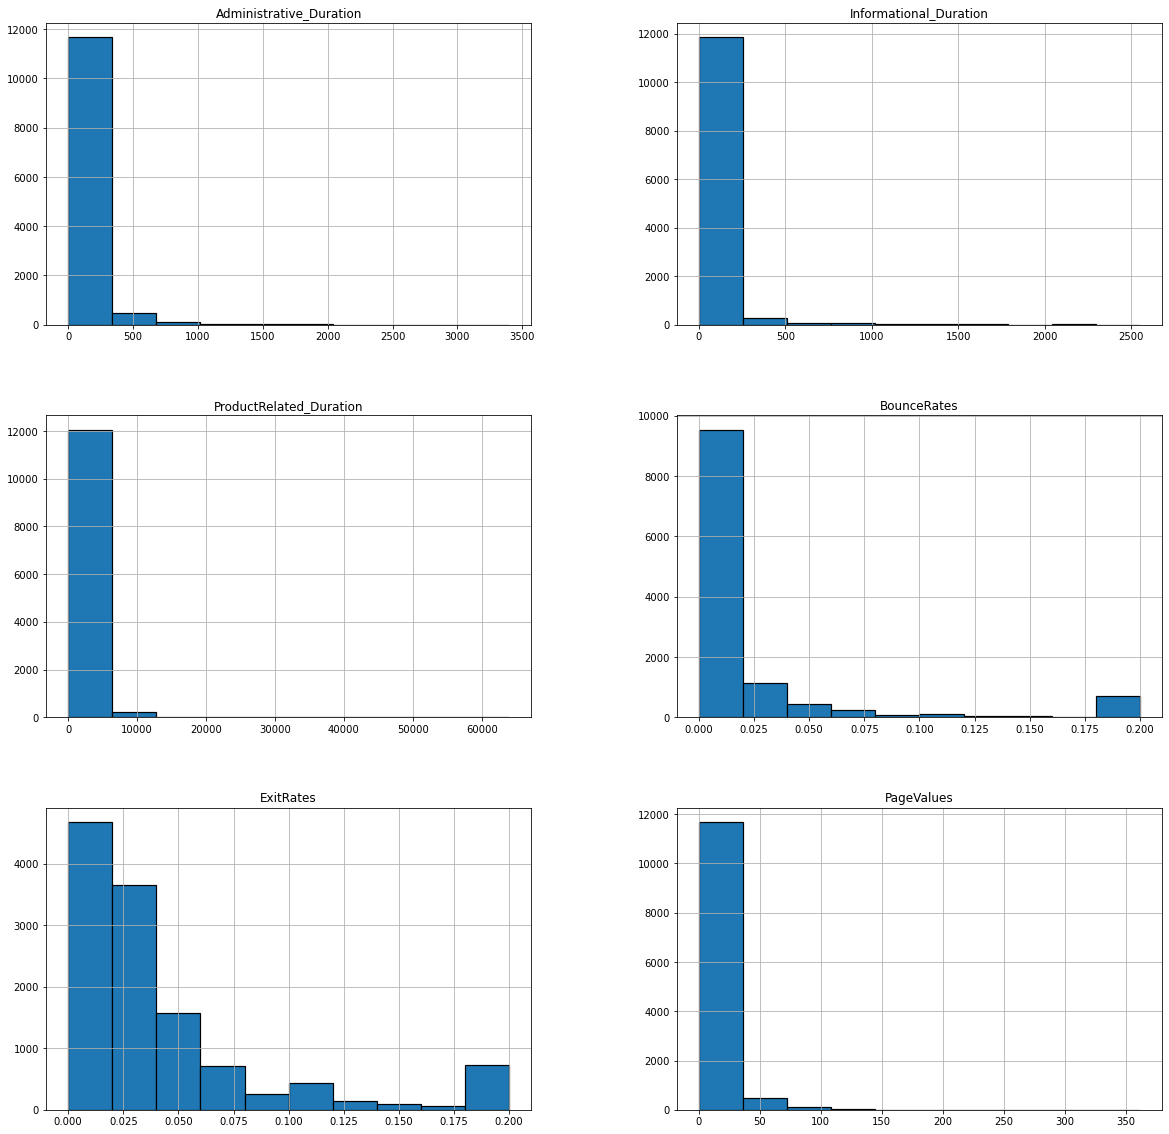

In [164]:
df.hist(column=num_col, edgecolor = 'black', linewidth = 1.2, figsize=(20,20))
plt.show()
# Data Distribusi

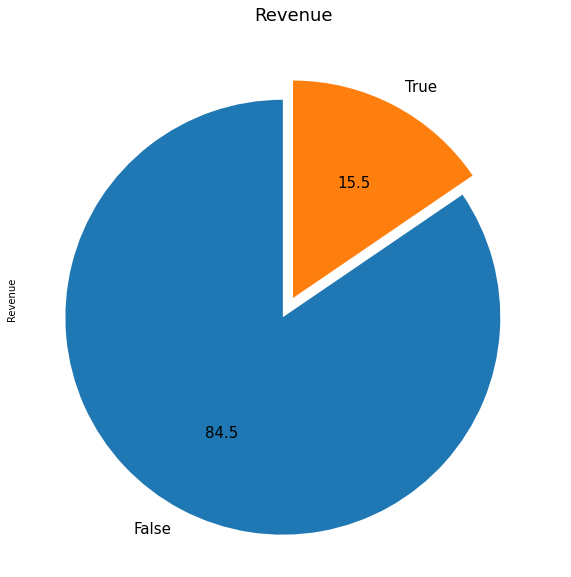

In [158]:
plt.figure(figsize=(10,10))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0))
plt.title('Revenue', fontsize = 18)
plt.show()
## Data Imbalanced

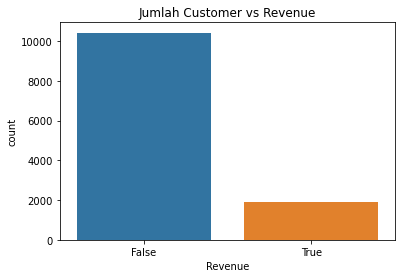

In [161]:
plt.title('Jumlah Customer vs Revenue')
sns.countplot(df['Revenue'])
plt.show()

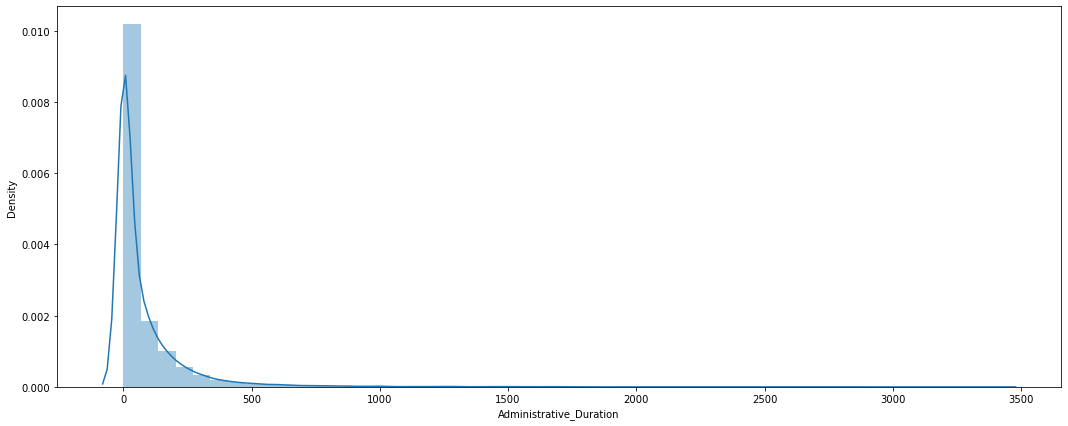

In [235]:
plt.figure(figsize = (18,7))
sns.distplot(df['Administrative_Duration'])
plt.title('Administrative Duration')
plt.show()
# Bisa Di lihat bahwa Cukup banyak Customer Meluangkan Waktu untuk melihat Halaman Depan Website

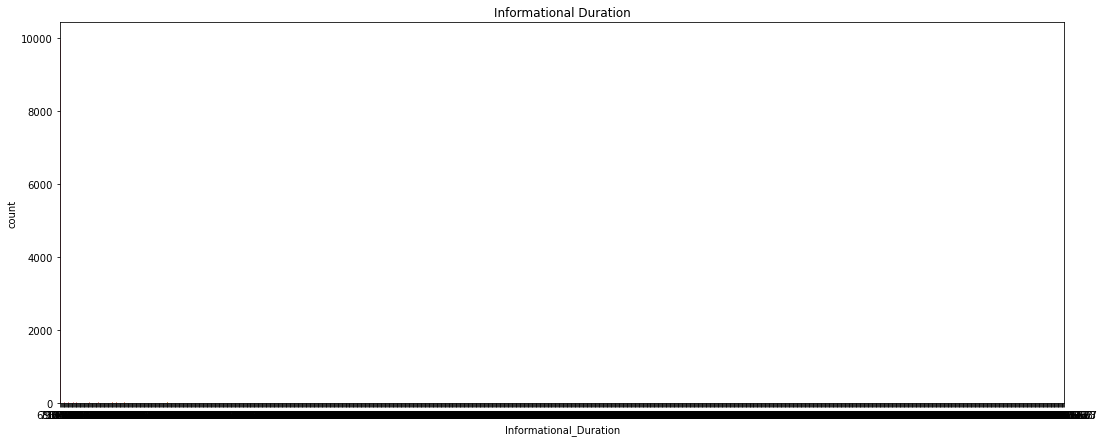

In [237]:
plt.figure(figsize = (18,7))
sns.countplot(df['Informational_Duration'])
plt.title('Informational Duration')
plt.show()
# Bisa di lihat bahwa Tidak ada Customer yang peduli untuk melihat Information Page di sebuat Website Online Shopping

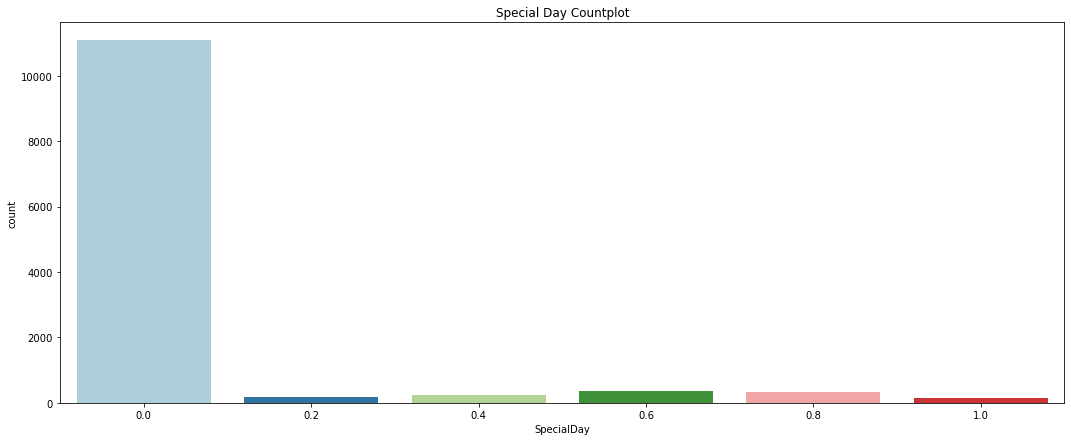

In [241]:
plt.figure(figsize = (18,7))
sns.countplot(df['SpecialDay'], palette = 'Paired')
plt.title('Special Day Countplot')
plt.show()

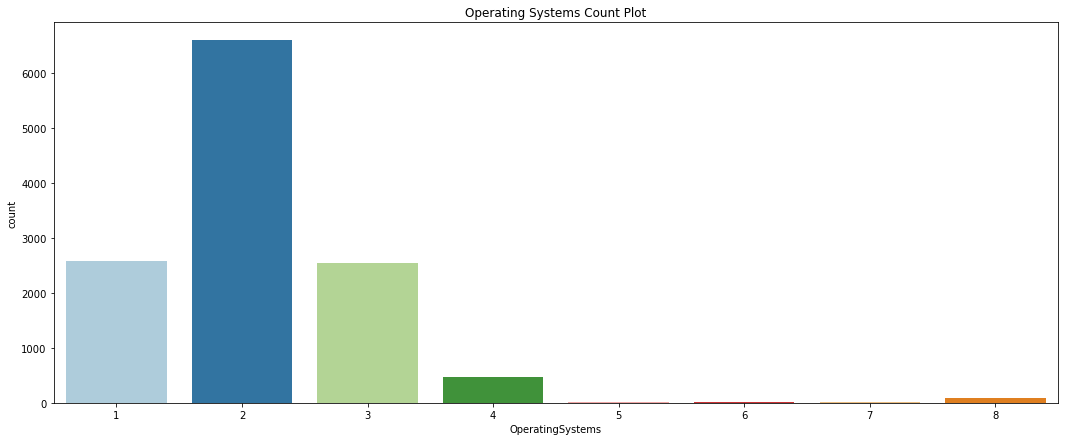

In [245]:
plt.figure(figsize = (18,7))
sns.countplot(df['OperatingSystems'], palette = 'Paired')
plt.title('Operating Systems Count Plot')
plt.show()
# Di ketahui Bahwa Customer yang Memiliki 2 Operating System, Merupakan yang paling banyak untuk melakukan Transaksi

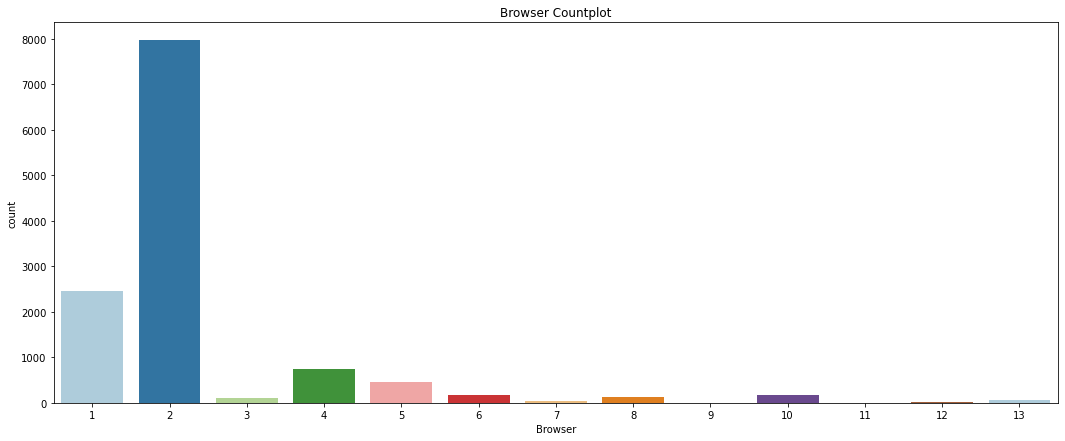

In [244]:
plt.figure(figsize = (18,7))
sns.countplot(df['Browser'], palette = 'Paired')
plt.title('Browser Countplot')
plt.show()
# Di Ketahui Bahwa Customer yang menggunakan 2 Browser adalah yang paling Sering Bertransaksi Online

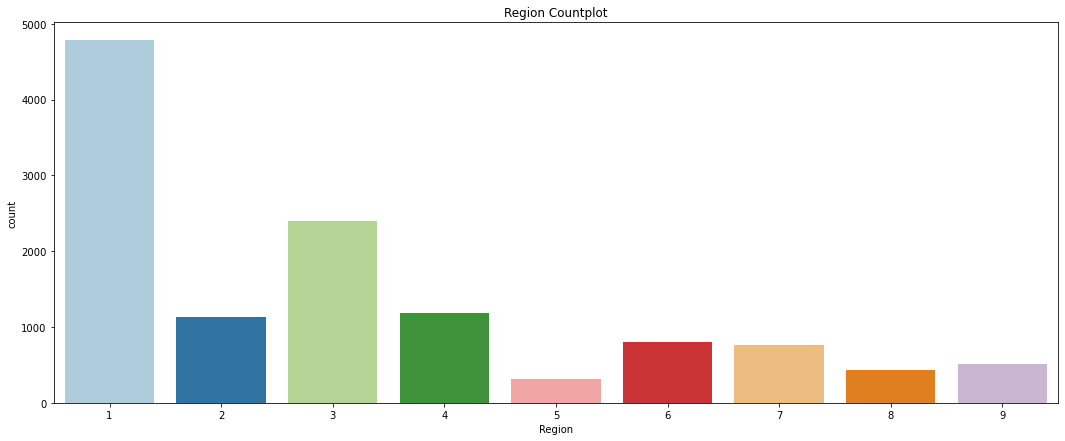

In [246]:
plt.figure(figsize = (18,7))
sns.countplot(df['Region'], palette = 'Paired')
plt.title('Region Countplot')
plt.show()
# Di ketahui Bahwa Region 1 Mempunyai Customer Paling banyak

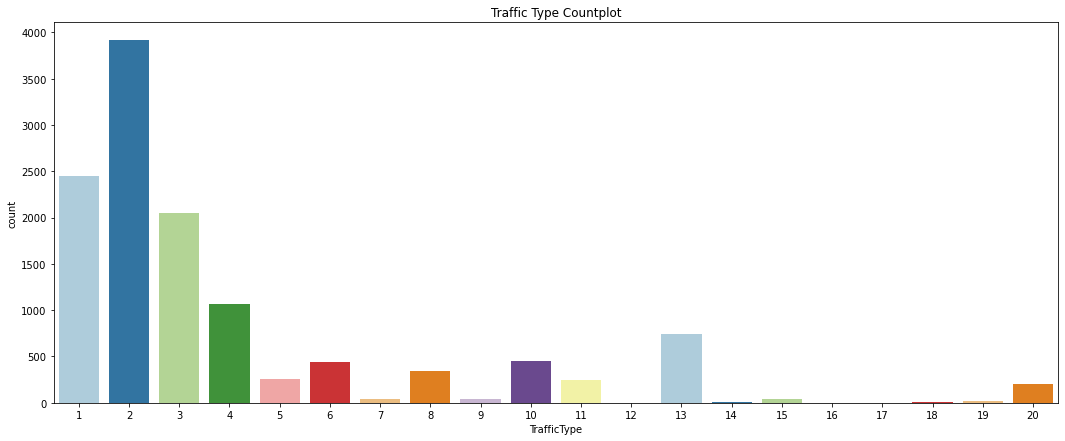

In [247]:
plt.figure(figsize = (18,7))
sns.countplot(df['TrafficType'], palette = 'Paired')
plt.title('Traffic Type Countplot')
plt.show()
# Traffic 2 Meruapakan Traffic type yang paling Ramai

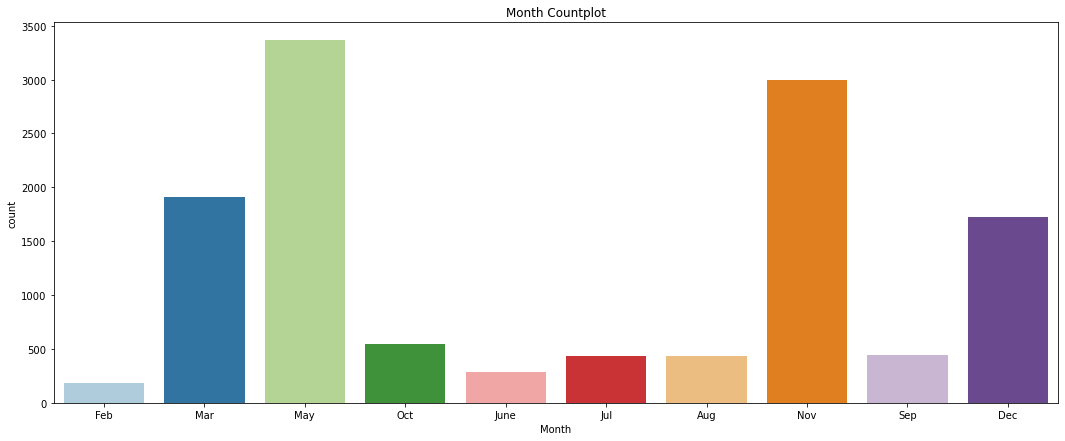

In [248]:
plt.figure(figsize = (18,7))
sns.countplot(df['Month'], palette = 'Paired')
plt.title('Month Countplot')
plt.show()
# Bulan Mei dan Bulan November Adalah Bulan Paling Ramai

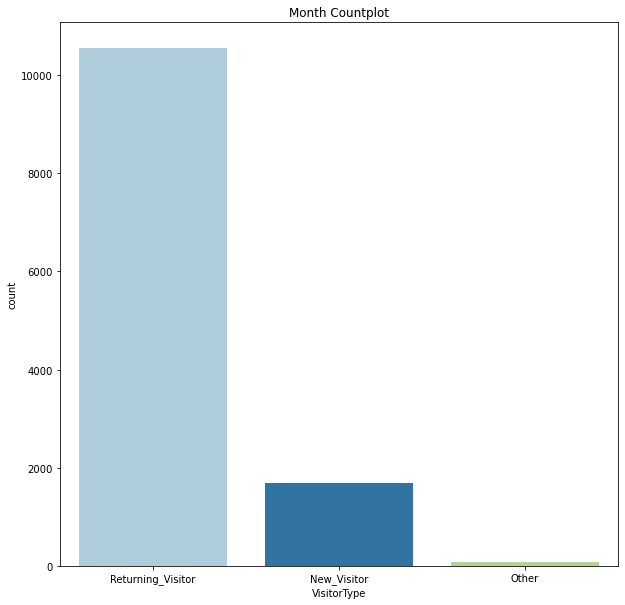

In [252]:
plt.figure(figsize = (10,10))
sns.countplot(df['VisitorType'], palette = 'Paired')
plt.title('Month Countplot')
plt.show()
# Returning Visitor Adalah Customer yang paling sering berbelanja

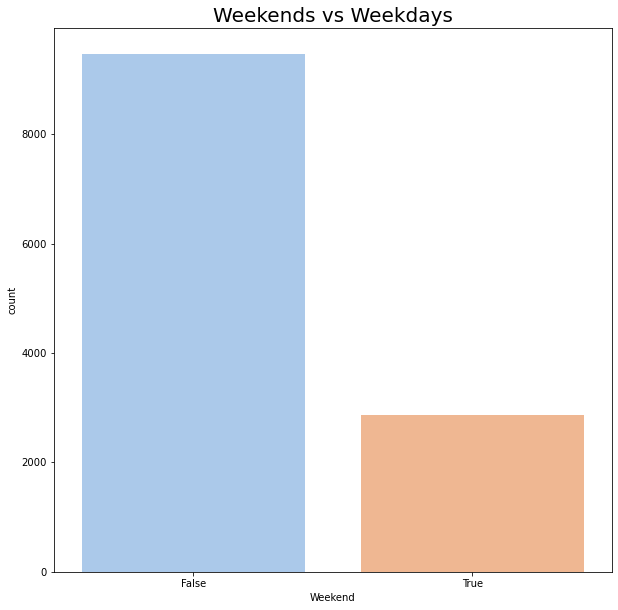

In [255]:
plt.figure(figsize = (10,10))
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Weekends vs Weekdays', fontsize = 20)
plt.show()
# Bisa di lihat bahwa, Kebanyakan Customer Berbelanja Di Weekend

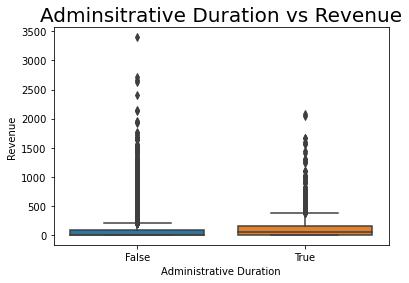

In [266]:
sns.boxplot(df['Revenue'], df['Administrative_Duration'])
plt.title('Adminsitrative Duration vs Revenue', fontsize = 20)
plt.xlabel('Administrative Duration')
plt.ylabel('Revenue')
plt.show()

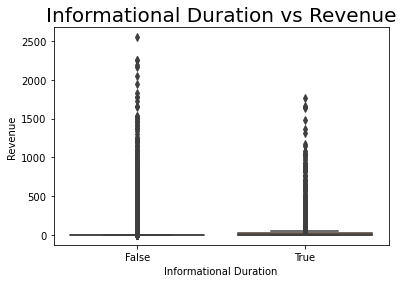

In [268]:
sns.boxplot(df['Revenue'], df['Informational_Duration'])
plt.title('Informational Duration vs Revenue', fontsize = 20)
plt.xlabel('Informational Duration')
plt.ylabel('Revenue')
plt.show()

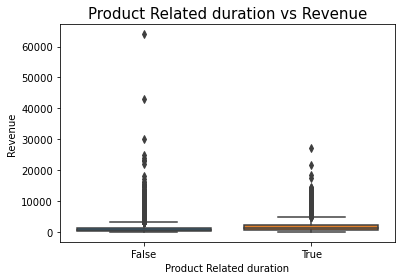

In [269]:
sns.boxplot(df['Revenue'], df['ProductRelated_Duration'])
plt.title('Product Related duration vs Revenue', fontsize = 15)
plt.xlabel('Product Related duration')
plt.ylabel('Revenue')
plt.show()

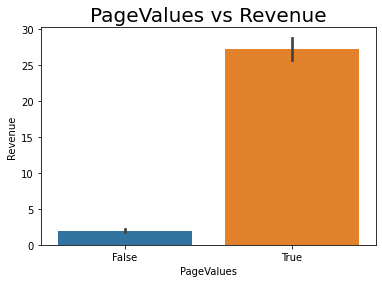

In [274]:
sns.barplot(df['Revenue'], df['PageValues'])
plt.title('PageValues vs Revenue', fontsize = 20)
plt.xlabel('PageValues')
plt.ylabel('Revenue')
plt.show()

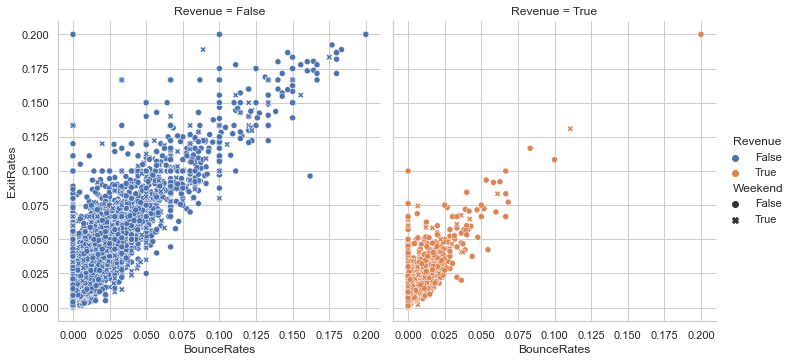

In [283]:
sns.relplot(x="BounceRates", y="ExitRates",col="Revenue",hue="Revenue",style="Weekend", data=df)
plt.show()
# Jumlah Bounce yang tinggi, dan Exit yang tinggi tidak akan menghasilkan Revenue
# Lebih Banyak Bounce dan Exit di lakukan di saat Weekdays

<Figure size 720x720 with 0 Axes>

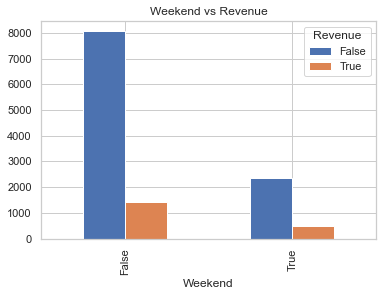

In [282]:
plt.figure(figsize = (10,10))
wxr = pd.crosstab(df['Weekend'], df['Revenue'])
wxr.plot(kind = 'bar')
plt.title('Weekend vs Revenue')
plt.show()

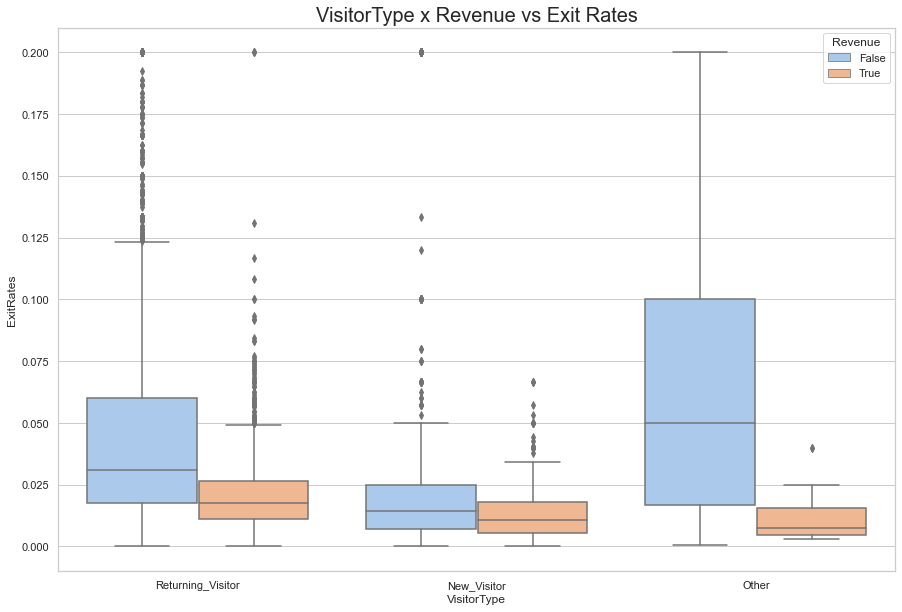

In [286]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'VisitorType', y = 'ExitRates', hue = 'Revenue', data = df, palette = 'pastel')
plt.title('VisitorType x Revenue vs Exit Rates', fontsize = 20)
plt.show()

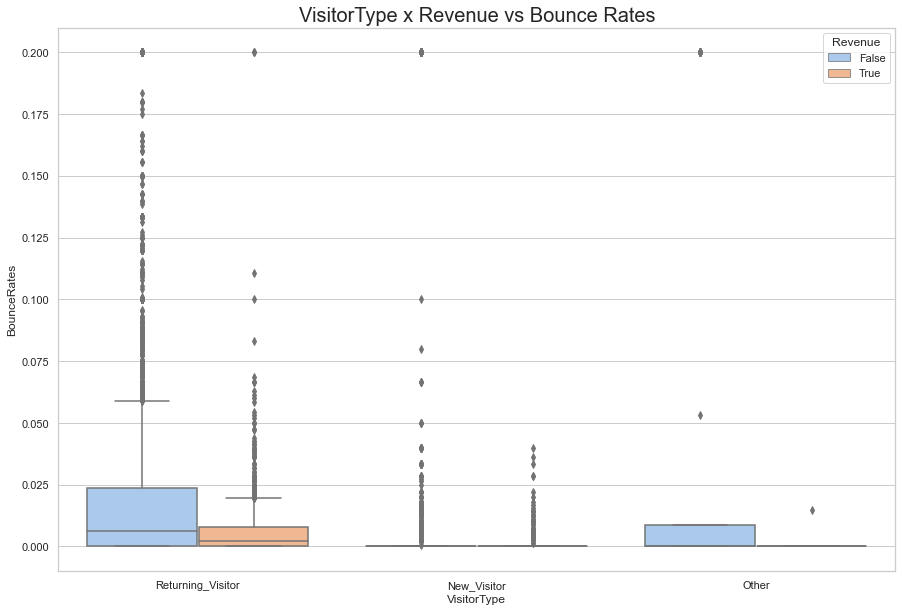

In [288]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'VisitorType', y = 'BounceRates', hue = 'Revenue', data = df, palette = 'pastel')
plt.title('VisitorType x Revenue vs Bounce Rates', fontsize = 20)
plt.show()

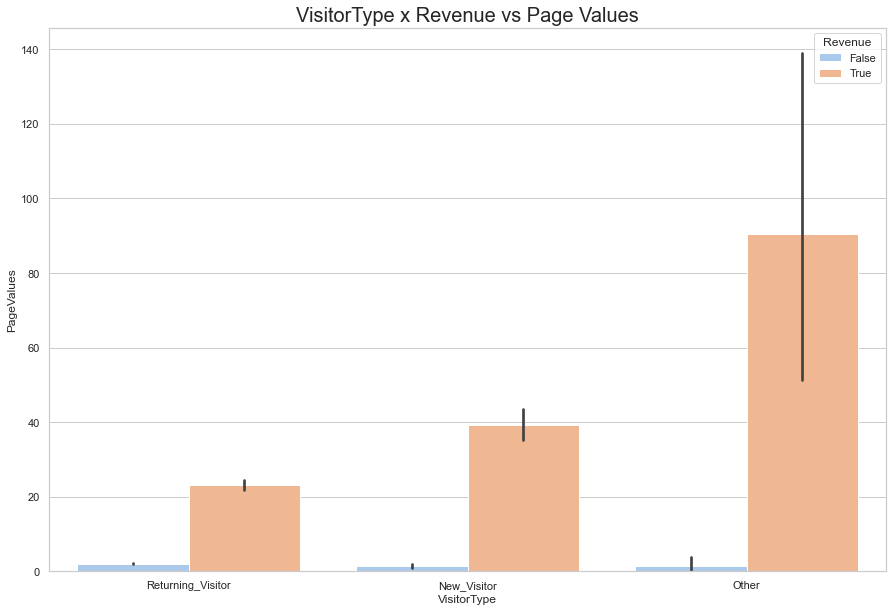

In [291]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'VisitorType', y = 'PageValues', hue = 'Revenue', data = df, palette = 'pastel')
plt.title('VisitorType x Revenue vs Page Values', fontsize = 20)
plt.show()

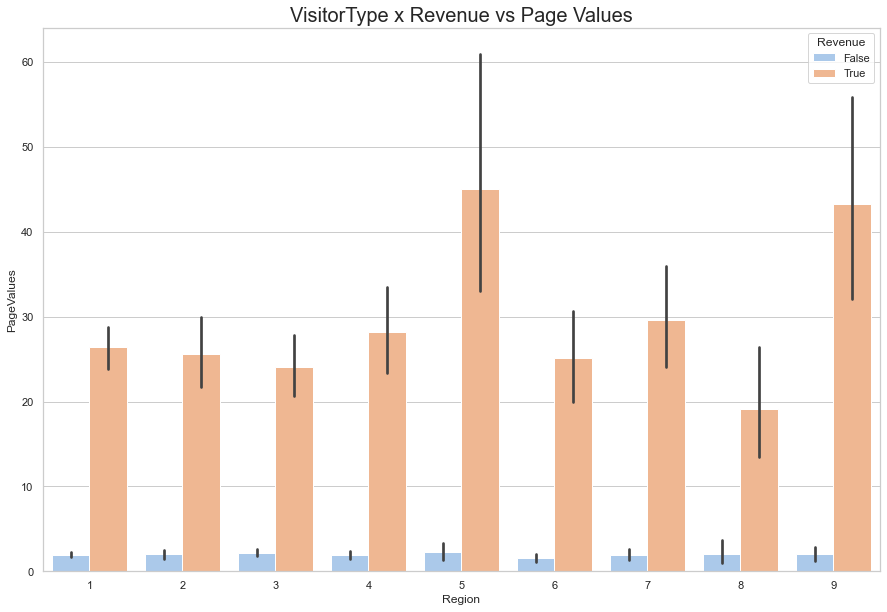

In [292]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Region', y = 'PageValues', hue = 'Revenue', data = df, palette = 'pastel')
plt.title('VisitorType x Revenue vs Page Values', fontsize = 20)
plt.show()

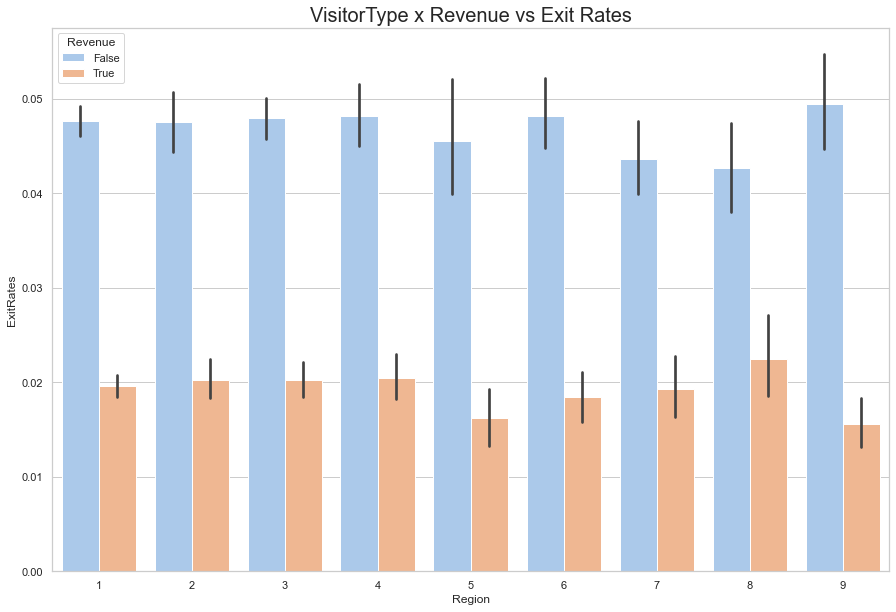

In [296]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Region', y = 'ExitRates', hue = 'Revenue', data = df, palette = 'pastel')
plt.title('VisitorType x Revenue vs Exit Rates', fontsize = 20)
plt.show()

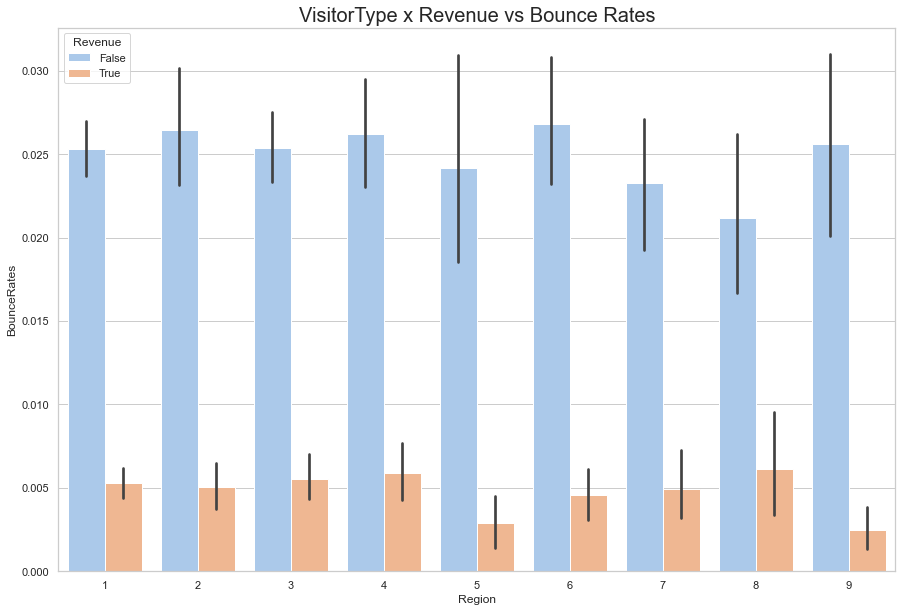

In [295]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Region', y = 'BounceRates', hue = 'Revenue', data = df, palette = 'pastel')
plt.title('VisitorType x Revenue vs Bounce Rates', fontsize = 20)
plt.show()

# Machine Learning Modelling

In [298]:
num_col

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [300]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## Data Preparation - Splitting Data

In [305]:
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [356]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

### Preparation Base Model

In [461]:
num_columns = ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']

cat_columns = ['Administrative','Informational', 'ProductRelated', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
              'Region', 'TrafficType', 'VisitorType', 'Weekend']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

categoric_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categorical', categoric_pipeline, cat_columns)
])

# pipe_SVM_Base = Pipeline([
#     ('prep', preprocessor),
#     ('algo', SVC(max_iter=400, probability=True)),
# ])

# pipe_DT_base = Pipeline([
#     ("prep", preprocessor),
#     ("algo", DecisionTreeClassifier(random_state = 42))
# ])

pipe_KNN_base = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier()),
])

pipe_LR_Base = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression()),
])

pipe_RF_Base = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42)),
])

pipe_XGB_Base = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier()),
])

## Evaluation Matrix Base Model

### LogisticRegression

In [462]:
pipe_LR_Base.fit(X_train, y_train)
ytr_lr_base = pipe_LR_Base.predict(X_train)
yts_lr_base = pipe_LR_Base.predict(X_test)
print(classification_report(y_train, ytr_lr_base))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      8338
           1       0.74      0.38      0.51      1526

    accuracy                           0.88      9864
   macro avg       0.82      0.68      0.72      9864
weighted avg       0.87      0.88      0.87      9864



              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2084
           1       0.74      0.40      0.52       382

    accuracy                           0.89      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.87      0.89      0.87      2466



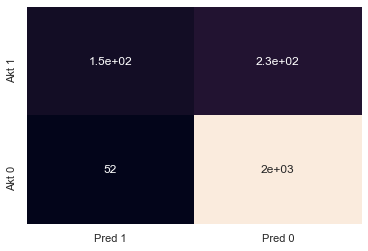

In [463]:
print(classification_report(y_test, yts_lr_base))
CM = confusion_matrix(y_test, yts_lr_base, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

### KNN

In [464]:
pipe_KNN_base.fit(X_train, y_train)
ytr_knn_base = pipe_KNN_base.predict(X_train)
yts_knn_base = pipe_KNN_base.predict(X_test)
print(classification_report(y_train, ytr_knn_base))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8338
           1       0.80      0.56      0.65      1526

    accuracy                           0.91      9864
   macro avg       0.86      0.76      0.80      9864
weighted avg       0.90      0.91      0.90      9864



              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2084
           1       0.64      0.44      0.52       382

    accuracy                           0.88      2466
   macro avg       0.77      0.70      0.73      2466
weighted avg       0.86      0.88      0.87      2466



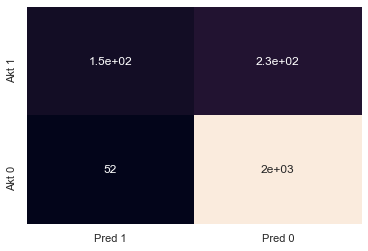

In [466]:
print(classification_report(y_test, yts_knn_base))
CM = confusion_matrix(y_test, yts_lr_base, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

### Random Forest

In [458]:
pipe_RF_Base.fit(X_train, y_train)
ytr_RF_base = pipe_RF_Base.predict(X_train)
yts_RF_base = pipe_RF_Base.predict(X_test)
print(classification_report(y_train, ytr_RF_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8338
           1       1.00      1.00      1.00      1526

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.73      0.56      0.63       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



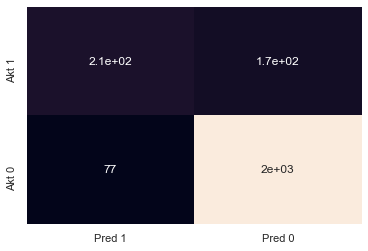

In [459]:
print(classification_report(y_test, yts_RF_base))
CM = confusion_matrix(y_test, yts_RF_base, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

### XGBoost 

In [431]:
pipe_XGB_Base.fit(X_train, y_train)
ytr_XGB_base = pipe_RF_Base.predict(X_train)
yts_XGB_base = pipe_RF_Base.predict(X_test)
print(classification_report(y_train, ytr_XGB_base))

[13:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8338
           1       1.00      1.00      1.00      1526

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.73      0.56      0.63       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



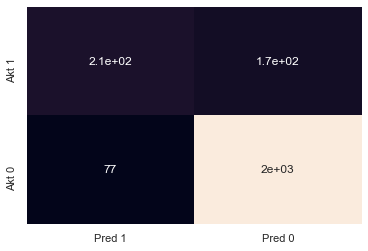

In [432]:
print(classification_report(y_test, yts_XGB_base))
CM = confusion_matrix(y_test, yts_XGB_base, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

In [433]:
dataML= {
    'Base LogisticRegression' : [precision_score(y_train, ytr_lr_base).round(2),precision_score(y_test, yts_lr_base).round(2)],
    'Base KNN' : [precision_score(y_train, ytr_knn_base).round(2),precision_score(y_test, yts_knn_base).round(2)],
#     'Base SVM' : [precision_score(y_train, ytr_svm_base).round(2),precision_score(y_test, yts_svm_base).round(2)],
    'Base RandomForest' : [precision_score(y_train, ytr_RF_base).round(2),precision_score(y_test, yts_RF_base).round(2)],
    'Base XGBoost' : [precision_score(y_train, ytr_XGB_base).round(2),precision_score(y_test, yts_XGB_base).round(2)]
}
data_ML = pd.DataFrame(data=dataML, index=['Precision Training','Precision Testing']).T
print('Evaluation Matrix Comparison')
data_ML

Evaluation Matrix Comparison


,Precision Training,Precision Testing
Base LogisticRegression,0.74,0.74
Base KNN,0.80,0.64
Base RandomForest,1.00,0.73
Base XGBoost,1.00,0.73


## Improvement - Feature Engineering

In [470]:
num_columns = ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']

cat_columns = ['Administrative','Informational', 'ProductRelated', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
              'Region', 'TrafficType', 'VisitorType', 'Weekend']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categorical', categoric_pipeline, cat_columns)
])

# pipe_SVM_Base = Pipeline([
#     ('prep', preprocessor),
#     ('algo', SVC(max_iter=400, probability=True)),
# ])

pipe_KNN_1 = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier()),
])

pipe_LR_1 = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(class_weight={0 : .1 , 1 : .9})),
])

pipe_RF_1 = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42, class_weight={0 : .1 , 1 : .9})),
])

pipe_XGB_1 = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(class_weight={0 : .1 , 1 : .9})),
])

### Logistic Regression - Class Weight

In [475]:
pipe_LR_1.fit(X_train, y_train)
ytr_lr_1 = pipe_LR_Base.predict(X_train)
yts_lr_1 = pipe_LR_Base.predict(X_test)
print(classification_report(y_train, ytr_lr_1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      8338
           1       0.74      0.38      0.51      1526

    accuracy                           0.88      9864
   macro avg       0.82      0.68      0.72      9864
weighted avg       0.87      0.88      0.87      9864



              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2084
           1       0.74      0.40      0.52       382

    accuracy                           0.89      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.87      0.89      0.87      2466



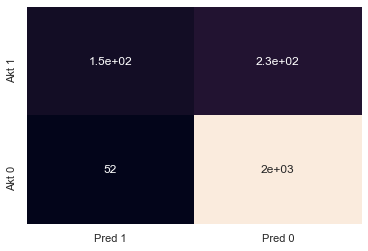

In [472]:
print(classification_report(y_test, yts_lr_1))
CM = confusion_matrix(y_test, yts_lr_1, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

### Random Forest - Class Weight

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      8338
           1       0.74      0.38      0.51      1526

    accuracy                           0.88      9864
   macro avg       0.82      0.68      0.72      9864
weighted avg       0.87      0.88      0.87      9864

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2084
           1       0.74      0.40      0.52       382

    accuracy                           0.89      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.87      0.89      0.87      2466



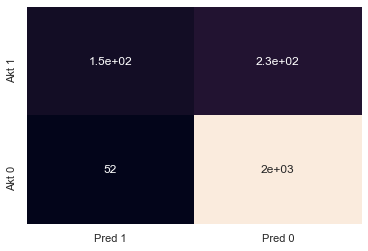

In [474]:
pipe_RF_1.fit(X_train, y_train)
ytr_rf_1 = pipe_LR_Base.predict(X_train)
yts_rf_1 = pipe_LR_Base.predict(X_test)
print(classification_report(y_train, ytr_rf_1))
print(classification_report(y_test, yts_rf_1))
CM = confusion_matrix(y_test, yts_rf_1, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

### XGB Class Weight

[14:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      8338
           1       0.74      0.38      0.51      1526

    accuracy                           0.88      9864
   macro avg       0.82      0.68      0.72      9864
weighted avg       0.87   

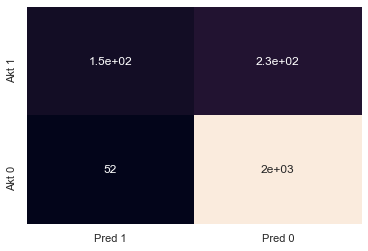

In [476]:
pipe_XGB_1.fit(X_train, y_train)
ytr_XGB_1 = pipe_LR_Base.predict(X_train)
yts_XGB_1 = pipe_LR_Base.predict(X_test)
print(classification_report(y_train, ytr_XGB_1))
print(classification_report(y_test, yts_XGB_1))
CM = confusion_matrix(y_test, yts_XGB_1, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

In [481]:
dataMLCW = {
    'CLass Weight LogisticRegression' : [precision_score(y_train, ytr_lr_1).round(2),precision_score(y_test, yts_lr_1).round(2)],
    'Class Weight RandomForest' : [precision_score(y_train, ytr_rf_1).round(2),precision_score(y_test, yts_rf_1.round(2))],
    'Class Weight XGBoost' : [precision_score(y_train, ytr_XGB_1).round(2),precision_score(y_test, yts_XGB_1).round(2)]
}
data_MLCW = pd.DataFrame(data=dataMLCW, index=['Precision Training','Precision Testing']).T
print('Evaluation Matrix Comparison')
data_MLCW

Evaluation Matrix Comparison


,Precision Training,Precision Testing
CLass Weight LogisticRegression,0.74,0.740000
Class Weight RandomForest,0.74,0.743842
Class Weight XGBoost,0.74,0.740000


## HyperParameter Tuning

### Logistric Regression

In [491]:
pipe_LogReg = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

In [504]:
param_LogReg = {
    'algo__penalty': ['none', 'l1', 'l2'],
    'algo__C': np.logspace(-4 , 4, 14),
    'algo__class_weight' : [{0 : .1 , 1 : .9}]
}

In [505]:
skf = StratifiedKFold(n_splits=3)

In [506]:
LogReg_GS = GridSearchCV(pipe_LogReg, param_LogReg, cv = skf, scoring='recall', n_jobs = -1, verbose=1)

In [507]:
LogReg_GS.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                         

In [508]:
LogReg_Tuned = LogReg_GS.best_estimator_

In [509]:
y_ts_LogRegTuned = LogReg_Tuned.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.62      0.75      2084
           1       0.30      0.88      0.44       382

    accuracy                           0.66      2466
   macro avg       0.63      0.75      0.60      2466
weighted avg       0.86      0.66      0.71      2466



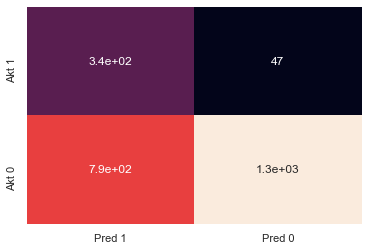

In [510]:
print(classification_report(y_test, y_ts_LogRegTuned))
CM = confusion_matrix(y_test, y_ts_LogRegTuned, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

### Random Forest - Hyper Parameter Tuning

In [515]:
param_RF = {
    'algo__n_estimators' : [700, 750, 800],
    'algo__max_depth': [3,4],
#     'algo__max_features': ['auto', 0.1, 0.2, 0.3],
    'algo__min_samples_leaf': [20, 25,30],
    'algo__class_weight' : [{0:x, 1: 1 - x} for x in [.15, .20]]
}
skf = StratifiedKFold(n_splits=3)
RF_GS = GridSearchCV(pipe_RF_Base, param_RF, cv = skf, scoring='precision', n_jobs = -1, verbose=1)
RF_GS.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Administrative_Duration',
                                                                          'Informational_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues']),
                                                                        ('categorical',
                       

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2084
           1       0.56      0.76      0.64       382

    accuracy                           0.87      2466
   macro avg       0.76      0.82      0.78      2466
weighted avg       0.89      0.87      0.88      2466



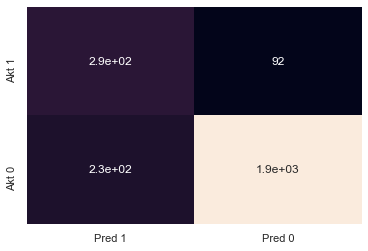

In [516]:
RF_Tuned = RF_GS.best_estimator_
y_ts_RFTuned = RF_Tuned.predict(X_test)
print(classification_report(y_test, y_ts_RFTuned))
CM = confusion_matrix(y_test, y_ts_RFTuned, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

### XGBoost - Hyper Parameter Tuning

In [536]:
param_XG = {
    'learning_rate': [1],
    "n_estimators" : np.arange(100, 500, 100),
 "max_depth" : [None, 5, 10, 25, 30, 40, 50, 60, 80, 95, 100],
#     'min_child_weight': [None, 5, 10, 25, 30, 40, 50, 60, 80, 95, 100],
#     'eta':[.3],
#     'subsample': [None, 5, 10, 25, 30, 40, 50, 60, 80, 95, 100],
    'colsample_bytree': [None, 5, 10, 25, 30, 40, 50, 60, 80, 95, 100],
    # Other parameters
    'objective': ['binary:logistic'],
    'scale_pos_weight' : [0.99]
}
XG_rand = XGBClassifier(random_state=42)
skf = StratifiedKFold(n_splits=3)
XG_RS= GridSearchCV(XG_rand, param_XG, cv=skf, n_jobs=-1, verbose=1, scoring='precision')
XG_RS.fit(X_train, y_train)

Fitting 3 folds for each of 484 candidates, totalling 1452 fits
[14:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     mis...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [None, 5, 10, 25, 30, 40, 50, 60,
       

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2084
           1       0.64      0.56      0.60       382

    accuracy                           0.88      2466
   macro avg       0.78      0.75      0.77      2466
weighted avg       0.88      0.88      0.88      2466



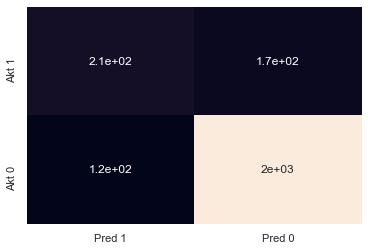

In [537]:
Model_XG_Tuned = XG_RS.best_estimator_
y_pred_XG_Tuned = Model_XG_Tuned.predict(X_test)
print(classification_report(y_test, y_pred_XG_Tuned))
CM = confusion_matrix(y_test, y_pred_XG_Tuned, labels=[1, 0])
conf = pd.DataFrame(CM, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
sns.heatmap(conf, annot=True, cbar=False)
plt.show()

In [538]:
data_akhir= {
    'Base LogisticRegression' : [precision_score(y_test, yts_lr_base).round(2)],
    'Base KNN' : [precision_score(y_test, yts_knn_base).round(2)],
    'Base RandomForest' : [precision_score(y_test, yts_RF_base).round(2)],
    'Base XGBoost' : [precision_score(y_test, yts_XGB_base).round(2)],
    'CLass Weight LogisticRegression' : [precision_score(y_test, yts_lr_1).round(2)],
    'Class Weight RandomForest' : [precision_score(y_test, yts_rf_1.round(2))],
    'Class Weight XGBoost' : [precision_score(y_test, yts_XGB_1).round(2)],
    'Hyper Parameter LogisticRegression' : [precision_score(y_test, yts_XGB_1).round(2)],
    'Hyper Parameter RandomForest' : [precision_score(y_test, yts_XGB_1).round(2)],
    'Hyper Parameter XGBoost' : [precision_score(y_test, yts_XGB_1).round(2)],
}
data_akhir1 = pd.DataFrame(data=data_akhir, index=['Hasil Testing']).T
print('Evaluation Matrix Comparison')
data_akhir1

Evaluation Matrix Comparison


,Hasil Testing
Base LogisticRegression,0.740000
Base KNN,0.640000
Base RandomForest,0.730000
Base XGBoost,0.730000
CLass Weight LogisticRegression,0.740000
Class Weight RandomForest,0.743842
Class Weight XGBoost,0.740000
Hyper Parameter LogisticRegression,0.740000
Hyper Parameter RandomForest,0.740000
Hyper Parameter XGBoost,0.740000


# Insight

- Data Imbalanced
- Terdapat Korelasi Terbesar di Page Values
- Bounce Rate Dan Exit Rates sangat berhubungan, Jika mempunyai Bounce Rate yang Tinggi, juga mempunyai Exit Rate yg tinggi
- Product Mendapatkan Revenue Terbanyak Dari Product Related
- New Visitors mempunyai Exit Rates yang sangat kecil
- Bounce dan Exit Rates tinggi di saat weekdays.
- PageValues pengaruh nya sangat besar untuk Revenue
- Di ketahui Bahwa Region 1 Mempunyai Customer Paling banyak
- Di ketahui Bahwa Customer yang Memiliki 2 Operating System, Merupakan yang paling banyak untuk melakukan Transaksi
- Cukup banyak Customer yang meluangkan waktu untuk melihat Administrative Page
- Region 9 adalah Region yang paling sering melakukan Exit, Dan tidak memberi Revenue
- Region 8 Adalah Region yang Paling sedikit untuk melakukan Exit
- Region 5, Adalah Region yang paling banyak menghasilkan Revenue Bagi Online Shop
- Customer bertype Others Mementingkan Berapa Banyak page di dalam website, dalam memustukan Ingin Beli Barang Atau Tidak
- Customer bertype Others Adalah Customer yang paling sering melakukan Bounce dan Tidak membeli
- Bounce Rate terbanyak juga berada di Bulan February yang tidak menghasilkan Revenue Untuk Online Shopping
- Tingkat Exit Terbanyak berada di Bulan February
- Di bulan Desember, Mei, Dan September Terjadi Pembelian Online shop paling banyak
- Di ketahui bahwa jumlah Customer yang menggunakan 2 Browser, adalah customer yang paling Sering Berbelanja Online
- Di ketahui bahwa jumlah terbanyak untuk melakukan pembelian Produk Online adalah yang Returning Visitor
- Special Day tidak terlalu berpengaruh terhadap Revenue

# Conclusion

- Hasil dari Machine Learning Model di atas menunjukan bahwa rata - rata precision rating adalah 0.74
    - Model terbaik jatuh kepada : Logistic Regression, karena model ini tidak overfitting
- Alasan Fokus di precision adalah:
    - Karena ingin menurunkan FP, karena datannya imbalance.
    - 0 = False, 1 = True untuk Revenue
    - FP untuk data ini sebagai, machine dapat memprediksi hasil 0 tetapi hasil nya 1
    - Dengan kata lain bisa meningkat kan Revenue Online Shop tersebut

# Recommendation
- Website harus mudah dan menarik untuk di gunakan.
    - Bisa di lakukan improvement untuk halaman depan website (Administrative Page)
- Seperti Umum nya website Online Shopping, Owner Business bisa melakukan transparancy terhadap Shipping Cost / Insurance Cost
- Bisa di Buatkan membership untuk Customer, Sebagai tanda loyalitas terhadap Online Shop tersebut
    - Membership: Membership juga bisa berlaku untuk pelanggan baru, semakin banyak spend nya semakin besar bonus nya
- Bisa membuat Iklan Saat Customer, Melihat - lihat barang dan saat Customer Ingin menutup Page tersebut
    - Contoh: Diskon
- Jika Website Dapat melakukan Worldwide Shopping, bisa di berlakukan transparancy untuk Foreign Exchange Rate
- Bisa membuat Event setiap Awal bulan, atau pada musim tertentu, dengan memberi diskon atau bonus lainnya
- Membuat UI website lebih menarik, contoh: membuat game (mengetuk icon bisa dapat voucher)
- Owner Website Online Shop juga dapat memberi keamanan untuk Customer, seperti One Time Password